In [100]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter

In [101]:
import warnings
warnings.filterwarnings('ignore')

# Part 1: London’s underground resilience

## I. Topological network

#### Preprocessing

In [102]:
# Create an undirected graph of the London Underground.
G = nx.read_graphml('london_tubenetwork.graphml')

In [103]:
# Since coords tuples are stored as string, need to convert them back to tuples using eval().
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [104]:
# Add the stations name to the edge attributes from the nodes attributes.
nod_name1 = {(e1,e2):(G.nodes[e1]['station_name']) for e1, e2 in G.edges()}
nod_name2 = {(e1,e2):(G.nodes[e2]['station_name']) for e1, e2 in G.edges()}

nx.set_edge_attributes(G, nod_name1, 'station_1_')
nx.set_edge_attributes(G, nod_name2, 'station_2_')

In [105]:
# To check node attributes.
list(G.nodes(data = True))[0]

('910GCAMHTH',
 {'station_name': 'Cambridge Heath',
  'lines': 'London Overground',
  'coords': (534825.0140298002, 183290.813466997)})

In [106]:
# To check edges attributes.
list(G.edges(data = True))[0]

('910GCAMHTH',
 '910GBTHNLGR',
 {'length': 1076.0822006959384,
  'name': 'London Overground',
  'line_id': 'LeaValleyLine1',
  'station_1_': 'Cambridge Heath',
  'station_2_': 'Bethnal Green'})

In [107]:
# Check the data.
df_1 = nx.to_pandas_edgelist(G)
df_1[0:10]

source       target       length         line_id               name  \
0   910GCAMHTH  910GBTHNLGR  1076.082201  LeaValleyLine1  London Overground   
1   910GCAMHTH  910GLONFLDS   970.949720  LeaValleyLine2  London Overground   
2  910GBTHNLGR    910GLIVST  1813.304143       LivStBeth  London Overground   
3  910GBTHNLGR  940GZZLUBLG   481.514661             NaN                NaN   
4  910GLONFLDS  910GHAKNYNM   917.502798  LeaValleyLine3  London Overground   
5  910GHAKNYNM  910GRCTRYRD  1178.231752  LeaValleyLine4  London Overground   
6  910GHAKNYNM  910GCLAPTON  1432.298268  ChingfordSpur1  London Overground   
7  910GRCTRYRD  910GSTKNWNG   775.442407  LeaValleyLine5  London Overground   
8  910GSTKNWNG  910GSTMFDHL  1200.722885  LeaValleyLine6  London Overground   
9  910GSTMFDHL  910GSEVNSIS  1001.203674  LeaValleyLine7  London Overground   

        station_1_               station_2_  
0  Cambridge Heath            Bethnal Green  
1  Cambridge Heath            London Fields  
2    Bethnal Green  Liverpool Street (Rail)  
3    Bethnal Green            Bethnal Green  
4    London Fields            Hackney Downs  
5    Hackney Downs             Rectory Road  
6    Hackney Downs                  Clapton  
7     Rectory Road          Stoke Newington  
8  Stoke Newington            Stamford Hill  
9    Stamford Hill     Seven Sisters (Rail)

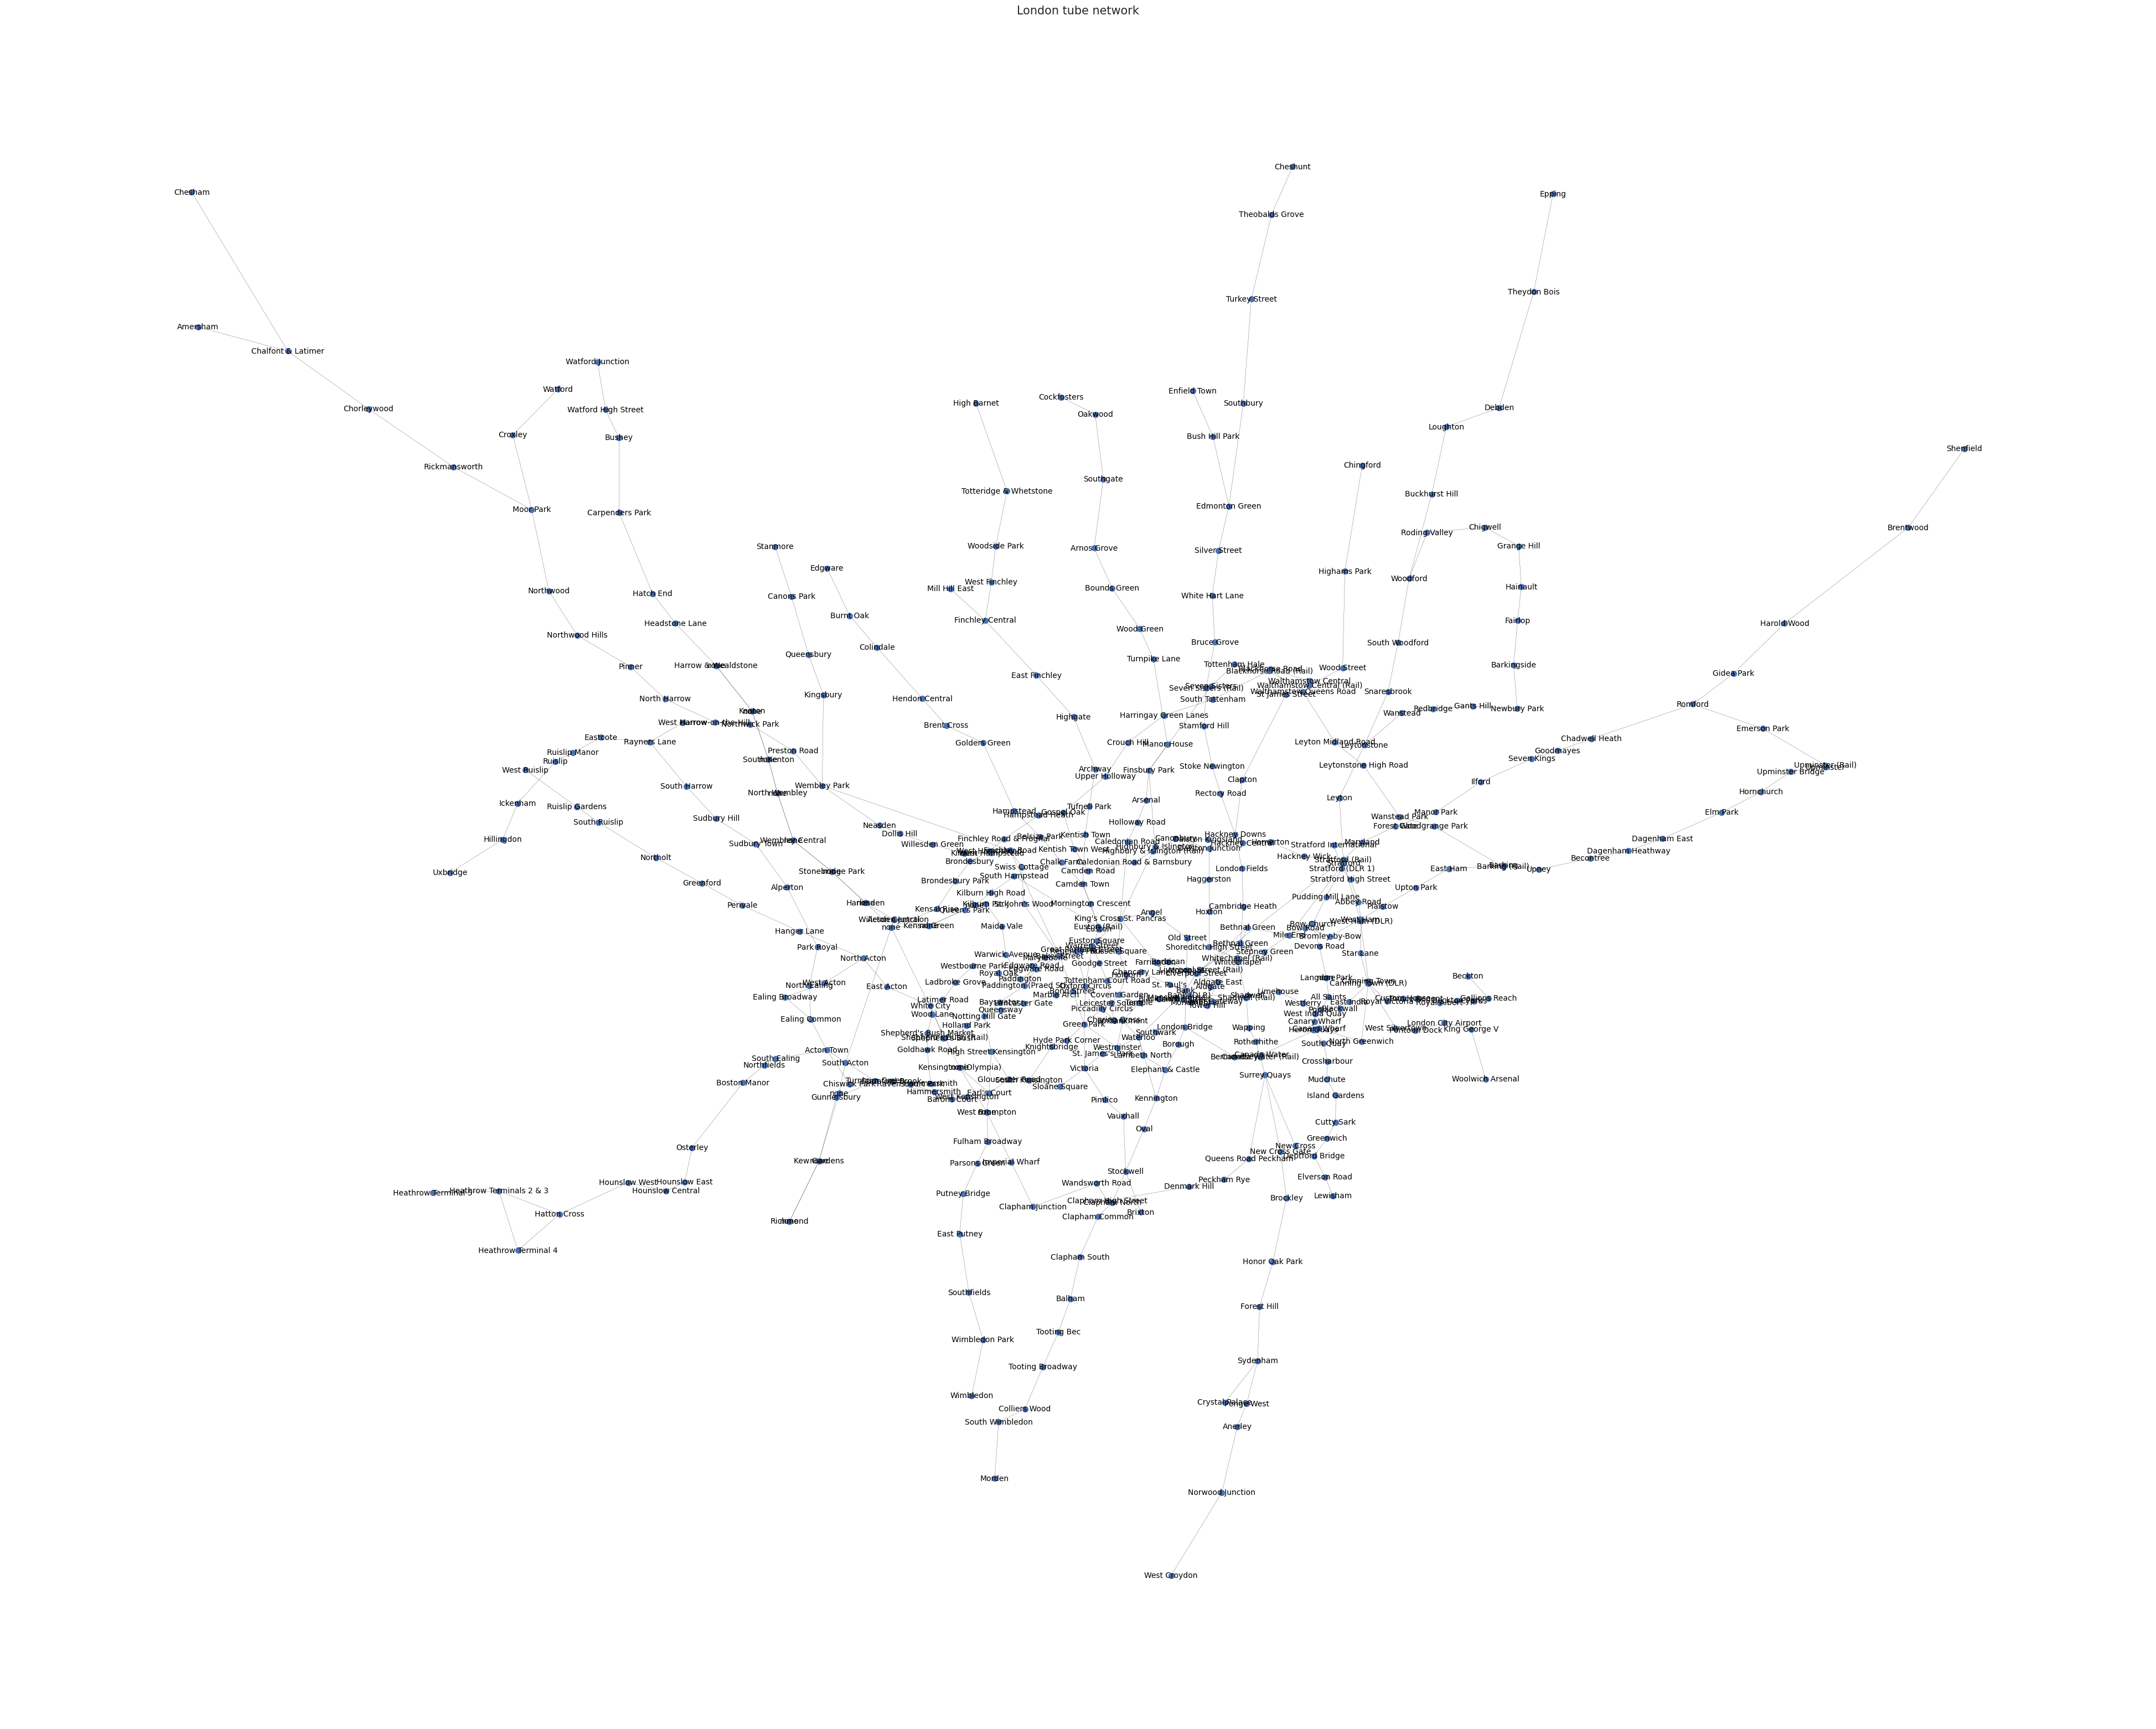

In [108]:
# Plot the tube network with the names of the stations as labels.
fig, ax = plt.subplots(figsize=(50, 40))

node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G, pos, node_size=50, node_color='b')
nx.draw_networkx_edges(G, pos, arrows=False, width=0.2)
nx.draw_networkx_labels(G, pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network", fontsize=15)
plt.axis("off")
plt.show()

### I.1. Centrality measures

First try multiple centrality measures and then select the most appropriate three.

#### Degree Centrality

In [10]:
# Calculate the degree centrality.
deg_london = nx.degree_centrality(G)
nx.set_node_attributes(G, dict(deg_london), 'degree')

In [11]:
# To dataframe using the nodes as the index.
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

station_name    degree
940GZZLUKSX  King's Cross St. Pancras  0.016018
940GZZLUBST              Baker Street  0.016018
940GZZLUOXC             Oxford Circus  0.013730
940GZZLUGPK                Green Park  0.013730
940GZZLUBNK                      Bank  0.013730
940GZZLUECT              Earl's Court  0.013730
940GZZLUWLO                  Waterloo  0.013730
940GZZLUTNG             Turnham Green  0.011442
940GZZDLCGT        Canning Town (DLR)  0.011442
940GZZLULVT          Liverpool Street  0.011442

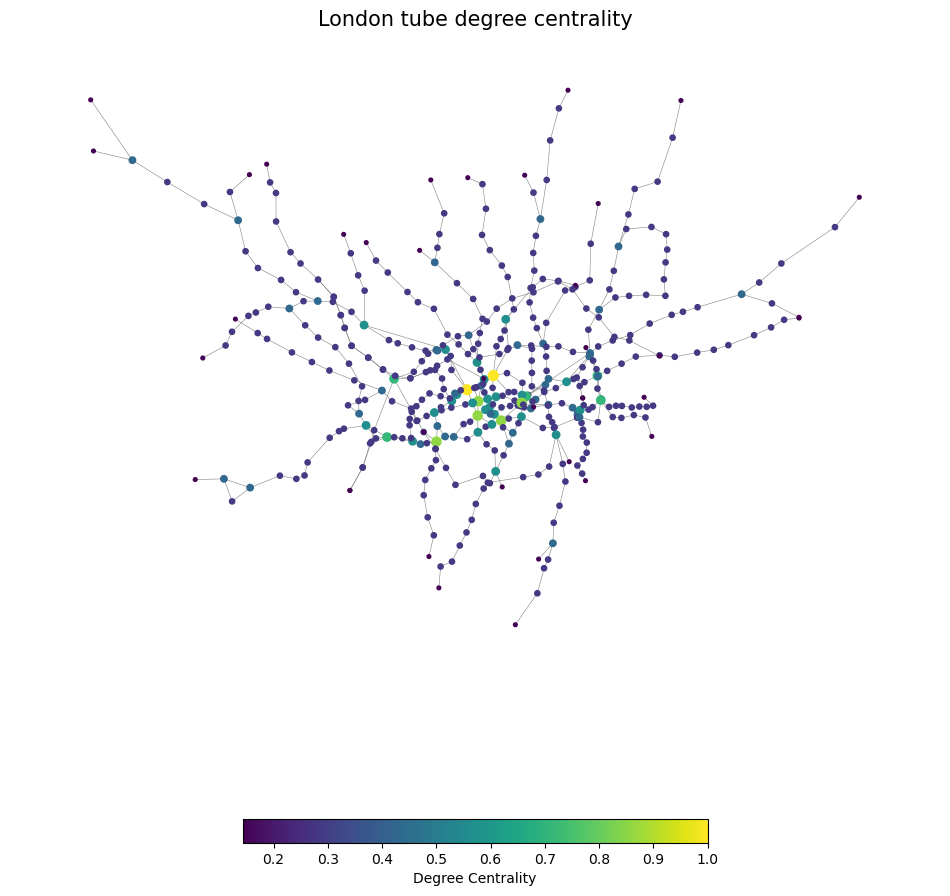

In [12]:
# Set colour and size of nodes according to degree values.
degree_values = [(i[1]['degree']) for i in G.nodes(data=True)]
deg_color = [(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size = [(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]

# Plot graph.

pos = pos

fig, ax = plt.subplots(figsize = (12,12))

nx.draw_networkx_edges(G, 
                       pos, 
                       edge_color='gray', 
                       width=0.4)

nod = nx.draw_networkx_nodes(G, 
                             pos=pos, 
                             node_color=deg_color, 
                             cmap=plt.cm.viridis, 
                             node_size=deg_size)

plt.colorbar(nod, label="Degree Centrality", orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube degree centrality", fontsize=15)
plt.show()

#### Betweenness Centrality

In [13]:
# Calculate the betweenness centrality.
bet_london = nx.betweenness_centrality(G)
nx.set_node_attributes(G,bet_london,'betweenness')

In [14]:
# Add betweenness centrality to dataframe.
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness'] = pd.Series(nx.get_node_attributes(G, 'betweenness'))

df_sorted = df.sort_values(["betweenness"], ascending=False)
df_sorted[0:10]

station_name    degree  betweenness
940GZZLUBST      Baker Street  0.016018     0.381015
940GZZLUBLG     Bethnal Green  0.006865     0.353433
940GZZLUFYR     Finchley Road  0.009153     0.336582
940GZZLUBNK              Bank  0.013730     0.319563
940GZZLUGPK        Green Park  0.013730     0.319552
940GZZLUWLO          Waterloo  0.013730     0.317216
940GZZLULVT  Liverpool Street  0.011442     0.313026
940GZZLUWSM       Westminster  0.009153     0.289962
940GZZLUBND       Bond Street  0.009153     0.258599
910GWHMDSTD    West Hampstead  0.006865     0.236566

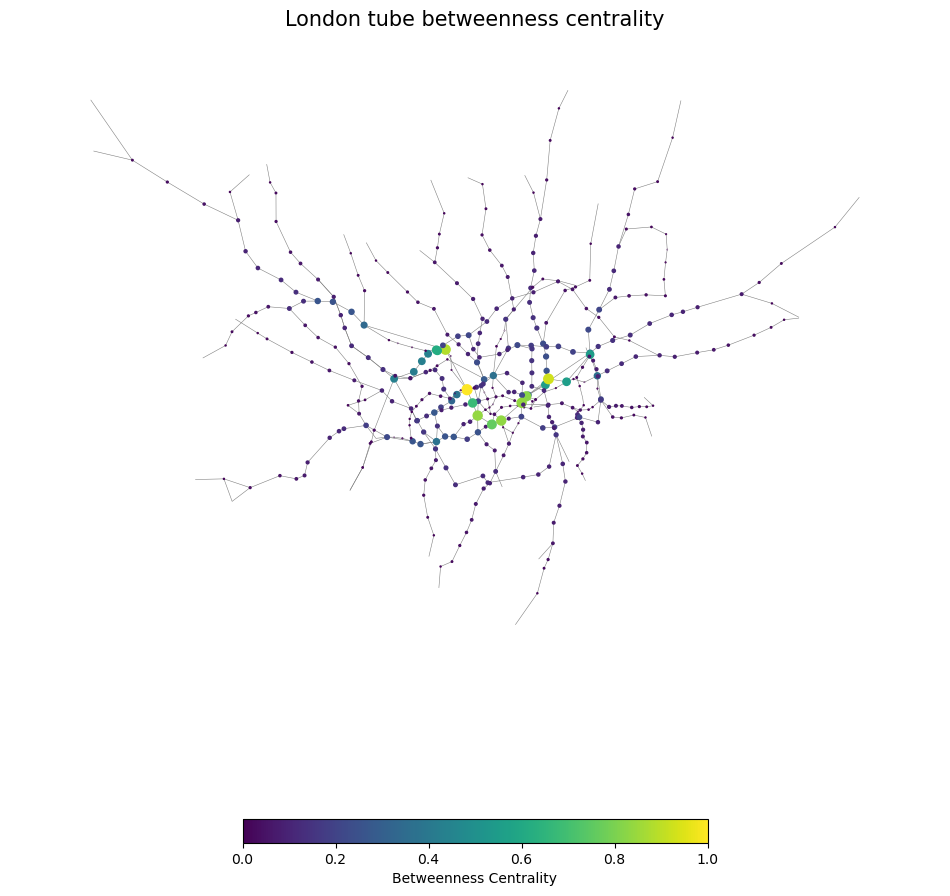

In [15]:
# Set colour and size of nodes according to betweenness values.
betweenness_values = [(i[1]['betweenness']) for i in G.nodes(data=True)]
bet_color = [(i[1]['betweenness']/max(betweenness_values)) for i in G.nodes(data=True)]
bet_size = [(i[1]['betweenness']/max(betweenness_values))*50 for i in G.nodes(data=True)]

# Plot graph.
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, 
                       pos=pos, 
                       edge_color='gray', 
                       width=0.4)

nod=nx.draw_networkx_nodes(G, 
                           pos=pos, 
                           node_color=bet_color, 
                           cmap=plt.cm.viridis, 
                           node_size=bet_size)

plt.colorbar(nod, label="Betweenness Centrality", orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality", fontsize=15)
plt.show()

#### Closeness Centrality

In [16]:
# Calculate the closeness centrality.
clo_london = nx.closeness_centrality(G)
nx.set_node_attributes(G, clo_london, 'closeness')

In [17]:
# Add closeness centrality to dataframe.
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness'] = pd.Series(nx.get_node_attributes(G, 'closeness'))

df_sorted = df.sort_values(["closeness"], ascending=False)
df_sorted[0:10]

station_name    degree  betweenness  closeness
940GZZLUGPK        Green Park  0.013730     0.319552   0.094897
940GZZLUBND       Bond Street  0.009153     0.258599   0.093737
940GZZLUWSM       Westminster  0.009153     0.289962   0.093197
940GZZLUBST      Baker Street  0.016018     0.381015   0.092900
940GZZLUWLO          Waterloo  0.013730     0.317216   0.092389
940GZZLUBNK              Bank  0.013730     0.319563   0.092000
940GZZLUOXC     Oxford Circus  0.013730     0.073865   0.091614
940GZZLULVT  Liverpool Street  0.011442     0.313026   0.090010
940GZZLURGP     Regent's Park  0.004577     0.017732   0.089275
940GZZLUFYR     Finchley Road  0.009153     0.336582   0.089165

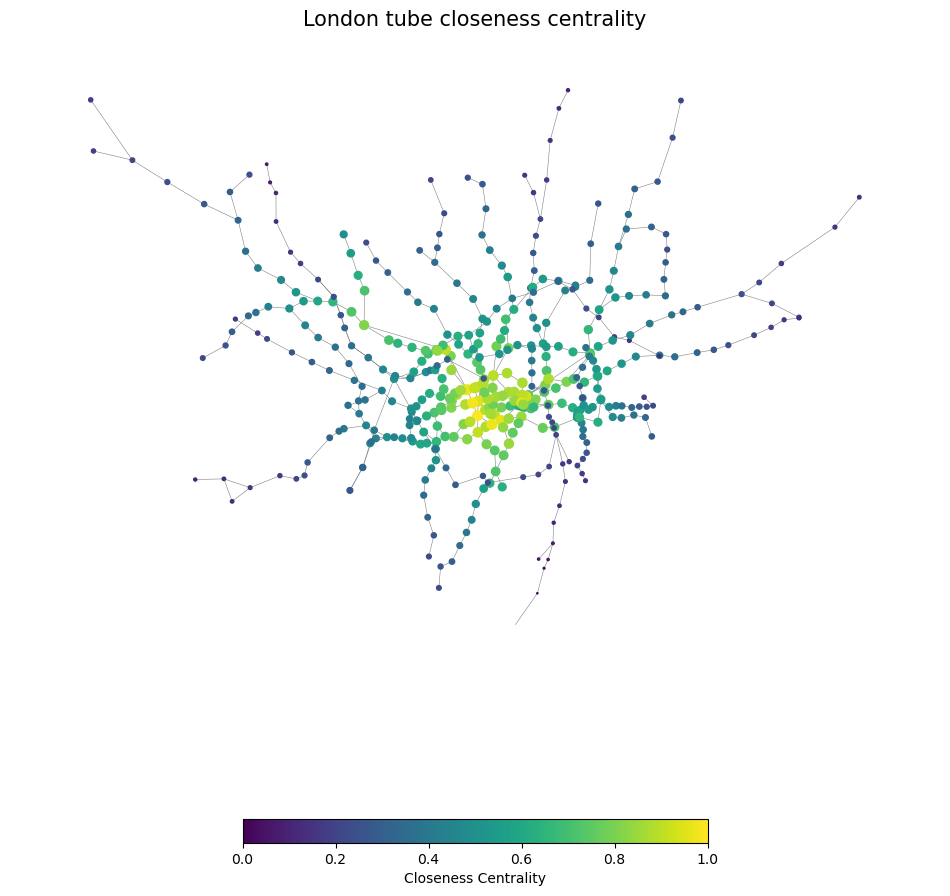

In [18]:
# Set colour and size of nodes according to closeness values.
closeness_values = [(i[1]['closeness']) for i in G.nodes(data=True)]
clo_color = [(i[1]['closeness']-min(closeness_values))/(max(closeness_values)-min(closeness_values)) for i in G.nodes(data=True)]
clo_size = [((i[1]['closeness']-min(closeness_values))/(max(closeness_values)-min(closeness_values))*50) for i in G.nodes(data=True)]

# Plot graph.
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, 
                       pos, 
                       edge_color='gray', 
                       width=0.4)

nod = nx.draw_networkx_nodes(G, 
                             pos=pos, 
                             node_color=clo_color, 
                             cmap=plt.cm.viridis, 
                             node_size=clo_size)

plt.colorbar(nod, label="Closeness Centrality", orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube closeness centrality", fontsize=15)
plt.show()

#### Eigenvector Centrality

In [19]:
# Calculate the eigenvector centrality.
egi_london = nx.eigenvector_centrality(G)
nx.set_node_attributes(G, egi_london, 'eigenvector')

In [20]:
# Add eigenvector centrality to dataframe.
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['eigenvector'] = pd.Series(nx.get_node_attributes(G, 'eigenvector'))

df_sorted = df.sort_values(["eigenvector"], ascending=False)
df_sorted[0:10]

station_name    degree  betweenness  closeness  \
940GZZLUOXC         Oxford Circus  0.013730     0.073865   0.091614   
940GZZLUGPK            Green Park  0.013730     0.319552   0.094897   
940GZZLUPCC     Piccadilly Circus  0.009153     0.006112   0.087786   
940GZZLUBND           Bond Street  0.009153     0.258599   0.093737   
940GZZLUBST          Baker Street  0.016018     0.381015   0.092900   
940GZZLUWSM           Westminster  0.009153     0.289962   0.093197   
940GZZLUTCR  Tottenham Court Road  0.009153     0.010858   0.087069   
940GZZLULSQ      Leicester Square  0.009153     0.002667   0.083845   
940GZZLUCHX         Charing Cross  0.006865     0.004060   0.086381   
940GZZLUWLO              Waterloo  0.013730     0.317216   0.092389   

             eigenvector  
940GZZLUOXC     0.399218  
940GZZLUGPK     0.391885  
940GZZLUPCC     0.310514  
940GZZLUBND     0.288661  
940GZZLUBST     0.220461  
940GZZLUWSM     0.220367  
940GZZLUTCR     0.210098  
940GZZLULSQ     0.205882  
940GZZLUCHX     0.179887  
940GZZLUWLO     0.179239

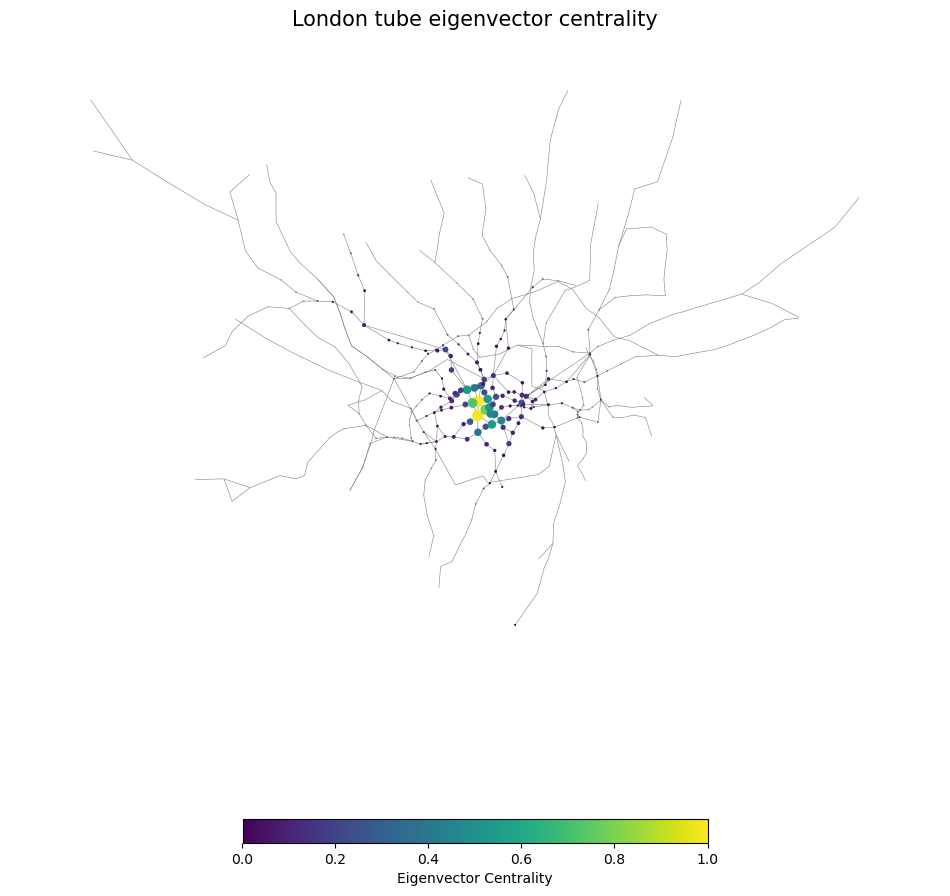

In [21]:
# Set colour and size of nodes according to eigenvector values.
eigenvector_values = [(i[1]['eigenvector']) for i in G.nodes(data=True)]
egi_color = [(i[1]['eigenvector'])/(max(eigenvector_values)) for i in G.nodes(data=True)]
egi_size = [(i[1]['eigenvector'])/(max(eigenvector_values))*50 for i in G.nodes(data=True)]

# Plot graph.
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, 
                       pos, 
                       edge_color='gray', 
                       width=0.4)

nod = nx.draw_networkx_nodes(G, 
                             pos=pos, 
                             node_color=egi_color, 
                             cmap=plt.cm.viridis, 
                             node_size=egi_size)

plt.colorbar(nod, label="Eigenvector Centrality", orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube eigenvector centrality", fontsize=15)
plt.show()

#### Summary

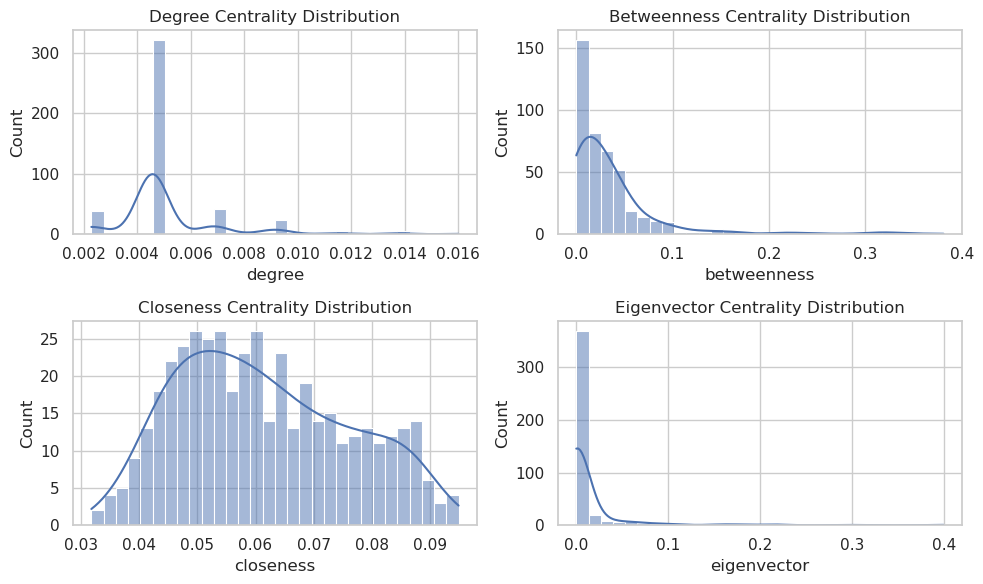

In [22]:
# Plot the distribution of four centralities.
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# degree centrality distribution
sns.histplot(data=df, x="degree", bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title("Degree Centrality Distribution")

# betweenness centrality distribution
sns.histplot(data=df, x="betweenness", bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_title("Betweenness Centrality Distribution")

# close centrality distribution
sns.histplot(data=df, x="closeness", bins=30, kde=True, ax=axes[1,0])
axes[1,0].set_title("Closeness Centrality Distribution")

# eigenvector centrality distribution
sns.histplot(data=df, x="eigenvector", bins=30, kde=True, ax=axes[1,1])
axes[1,1].set_title("Eigenvector Centrality Distribution")

plt.tight_layout()
plt.show()

In [23]:
# 对每种中心性进行排序，并提取前十名
top_degree = df.nlargest(10, 'degree')[['station_name', 'degree']]
top_betweenness = df.nlargest(10, 'betweenness')[['station_name', 'betweenness']]
top_closeness = df.nlargest(10, 'closeness')[['station_name', 'closeness']]
top_eigenvector = df.nlargest(10, 'eigenvector')[['station_name', 'eigenvector']]

# 重置索引，以便于合并
top_degree.reset_index(drop=True, inplace=True)
top_betweenness.reset_index(drop=True, inplace=True)
top_closeness.reset_index(drop=True, inplace=True)
top_eigenvector.reset_index(drop=True, inplace=True)

# 合并这四个表格
top_centralities = pd.concat([top_degree, top_betweenness, top_closeness, top_eigenvector], axis=1)

# 给列重命名以反映相应的中心性
top_centralities.columns = ['Station Name (Degree)', 'Degree',
                            'Station Name (Betweenness)', 'Betweenness',
                            'Station Name (Closeness)', 'Closeness',
                            'Station Name (Eigenvector)', 'Eigenvector']

top_centralities

Station Name (Degree)    Degree Station Name (Betweenness)  Betweenness  \
0  King's Cross St. Pancras  0.016018               Baker Street     0.381015   
1              Baker Street  0.016018              Bethnal Green     0.353433   
2                Green Park  0.013730              Finchley Road     0.336582   
3             Oxford Circus  0.013730                       Bank     0.319563   
4              Earl's Court  0.013730                 Green Park     0.319552   
5                      Bank  0.013730                   Waterloo     0.317216   
6                  Waterloo  0.013730           Liverpool Street     0.313026   
7             Turnham Green  0.011442                Westminster     0.289962   
8          Liverpool Street  0.011442                Bond Street     0.258599   
9                  West Ham  0.011442             West Hampstead     0.236566   

  Station Name (Closeness)  Closeness Station Name (Eigenvector)  Eigenvector  
0               Green Park   0.094897              Oxford Circus     0.399218  
1              Bond Street   0.093737                 Green Park     0.391885  
2              Westminster   0.093197          Piccadilly Circus     0.310514  
3             Baker Street   0.092900                Bond Street     0.288661  
4                 Waterloo   0.092389               Baker Street     0.220461  
5                     Bank   0.092000                Westminster     0.220367  
6            Oxford Circus   0.091614       Tottenham Court Road     0.210098  
7         Liverpool Street   0.090010           Leicester Square     0.205882  
8            Regent's Park   0.089275              Charing Cross     0.179887  
9            Finchley Road   0.089165                   Waterloo     0.179239

### I.2. Impact measures

#### Global Efficiency

In [24]:
# Taking G as an example to calculate the global efficiency.
global_eff = nx.global_efficiency(G)
print("Global Efficiency of the network G is:", global_eff)

Global Efficiency of the network G is: 0.08135196743399546


#### Normalized Largest Connected Component

In [25]:
# Taking G as an example to calculate the NLCC.

# Compute all connected components.
connected_components = list(nx.connected_components(G))

# Find the largest connected component.
largest_cc = max(connected_components, key=len)

# Compute the size of the normalized largest connected component.
NLCC = len(largest_cc) / G.number_of_nodes()

print("Normalized Largest Connected Component size of the network G is::", NLCC)

Normalized Largest Connected Component size of the network G is:: 1.0


In [26]:
def calculate_nlcc(G):
    """
    Calculate the Normalized Largest Connected Component (NLCC) size of a graph.

    Parameters:
    - G: A NetworkX graph object (undirected).

    Returns:
    - The size of the largest connected component, normalized by the total number of nodes in the graph.
    """
    # Make sure G is an undirected graph.
    if G.is_directed():
        raise ValueError("G must be an undirected graph.")

    # Compute all connected components.
    connected_components = list(nx.connected_components(G))
    
    # Find the largest connected component.
    largest_cc = max(connected_components, key=len)
    
    # Compute the size of the normalized largest connected component.
    normalized_largest_cc_size = len(largest_cc) / G.number_of_nodes()
    
    return normalized_largest_cc_size

### I.3. Node removal

#### A) Non-sequential removal

In [60]:
# To check node attributes.
list(G.nodes(data = True))[0]

('910GCAMHTH',
 {'station_name': 'Cambridge Heath',
  'lines': 'London Overground',
  'coords': (534825.0140298002, 183290.813466997),
  'degree': 0.004576659038901602,
  'betweenness': 0.09583691978250373,
  'closeness': 0.07701797673598872,
  'eigenvector': 0.001703079639336722})

In [65]:
def plot_result_network(G, measure):
    # 计算中心性度量的值，用于设置颜色和大小
    values = [data[measure] for _, data in G.nodes(data=True)]
    min_value, max_value = min(values), max(values)
    
    # 根据中心性度量值计算颜色和大小
    color = [(value - min_value) / (max_value - min_value) for value in values]
    size = [((value - min_value) / (max_value - min_value) * 50) + 10 for value in values]  # 添加基础大小以避免太小的节点
    
    # 绘制网络图
    fig, ax = plt.subplots(figsize=(12, 12))
    pos = nx.get_node_attributes(G, 'coords')

    # 绘制边
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.4)

    # 绘制节点
    nodes = nx.draw_networkx_nodes(G, pos, node_color=color, cmap=plt.cm.viridis, node_size=size)

    # 添加颜色条
    plt.colorbar(nodes, label=f"{measure.capitalize()} Centrality", orientation="horizontal", shrink=0.5)

    # 设置图表
    plt.axis("off")
    plt.title(f"Network {measure.capitalize()} Centrality", fontsize=15)
    plt.show()

In [89]:
def plot_result_network_cc(G, measure):
    # 获取G的所有连通分量
    connected_components = list(nx.connected_components(G))
    
    # 准备画布
    plt.figure(figsize=(30, 30))
    
    for i, nodes in enumerate(connected_components):
        # 提取当前连通分量的子图
        subgraph = G.subgraph(nodes)
        
        # 为子图生成布局
        pos = nx.get_node_attributes(G, 'coords')

        node_labels = nx.get_node_attributes(G, 'station_name')

        nx.draw_networkx_edges(subgraph, pos, edge_color='gray', width=0.4)
        nx.draw_networkx_nodes(subgraph, pos, node_color=f'C{i}', node_size=50)
        nx.draw_networkx_labels(subgraph, pos, node_labels, font_size=7, font_color='black')
    
    # 设置图表
    plt.axis('off')
    plt.title(f'Connected Components of {measure.capitalize()} Centrality', fontsize=15)
    plt.show()

In [90]:
# List of centrality measures.
measure_names = ['degree', 'betweenness', 'closeness', 'eigenvector']

# Data structure to store results.
results = []

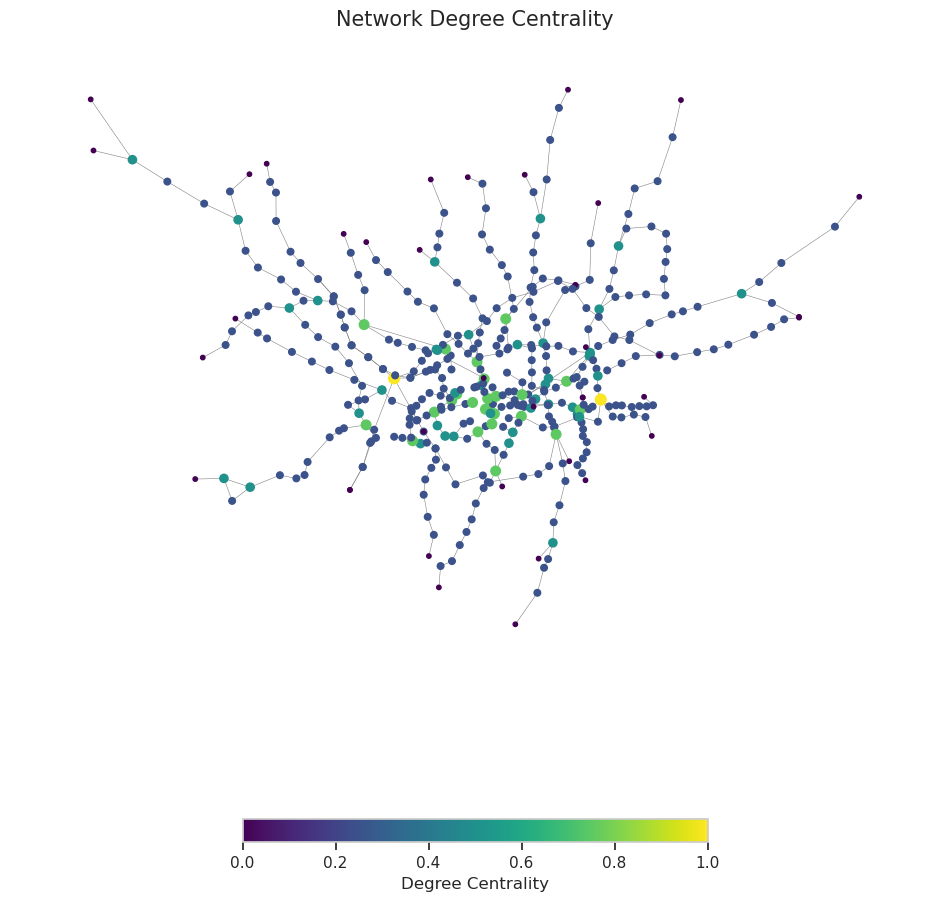

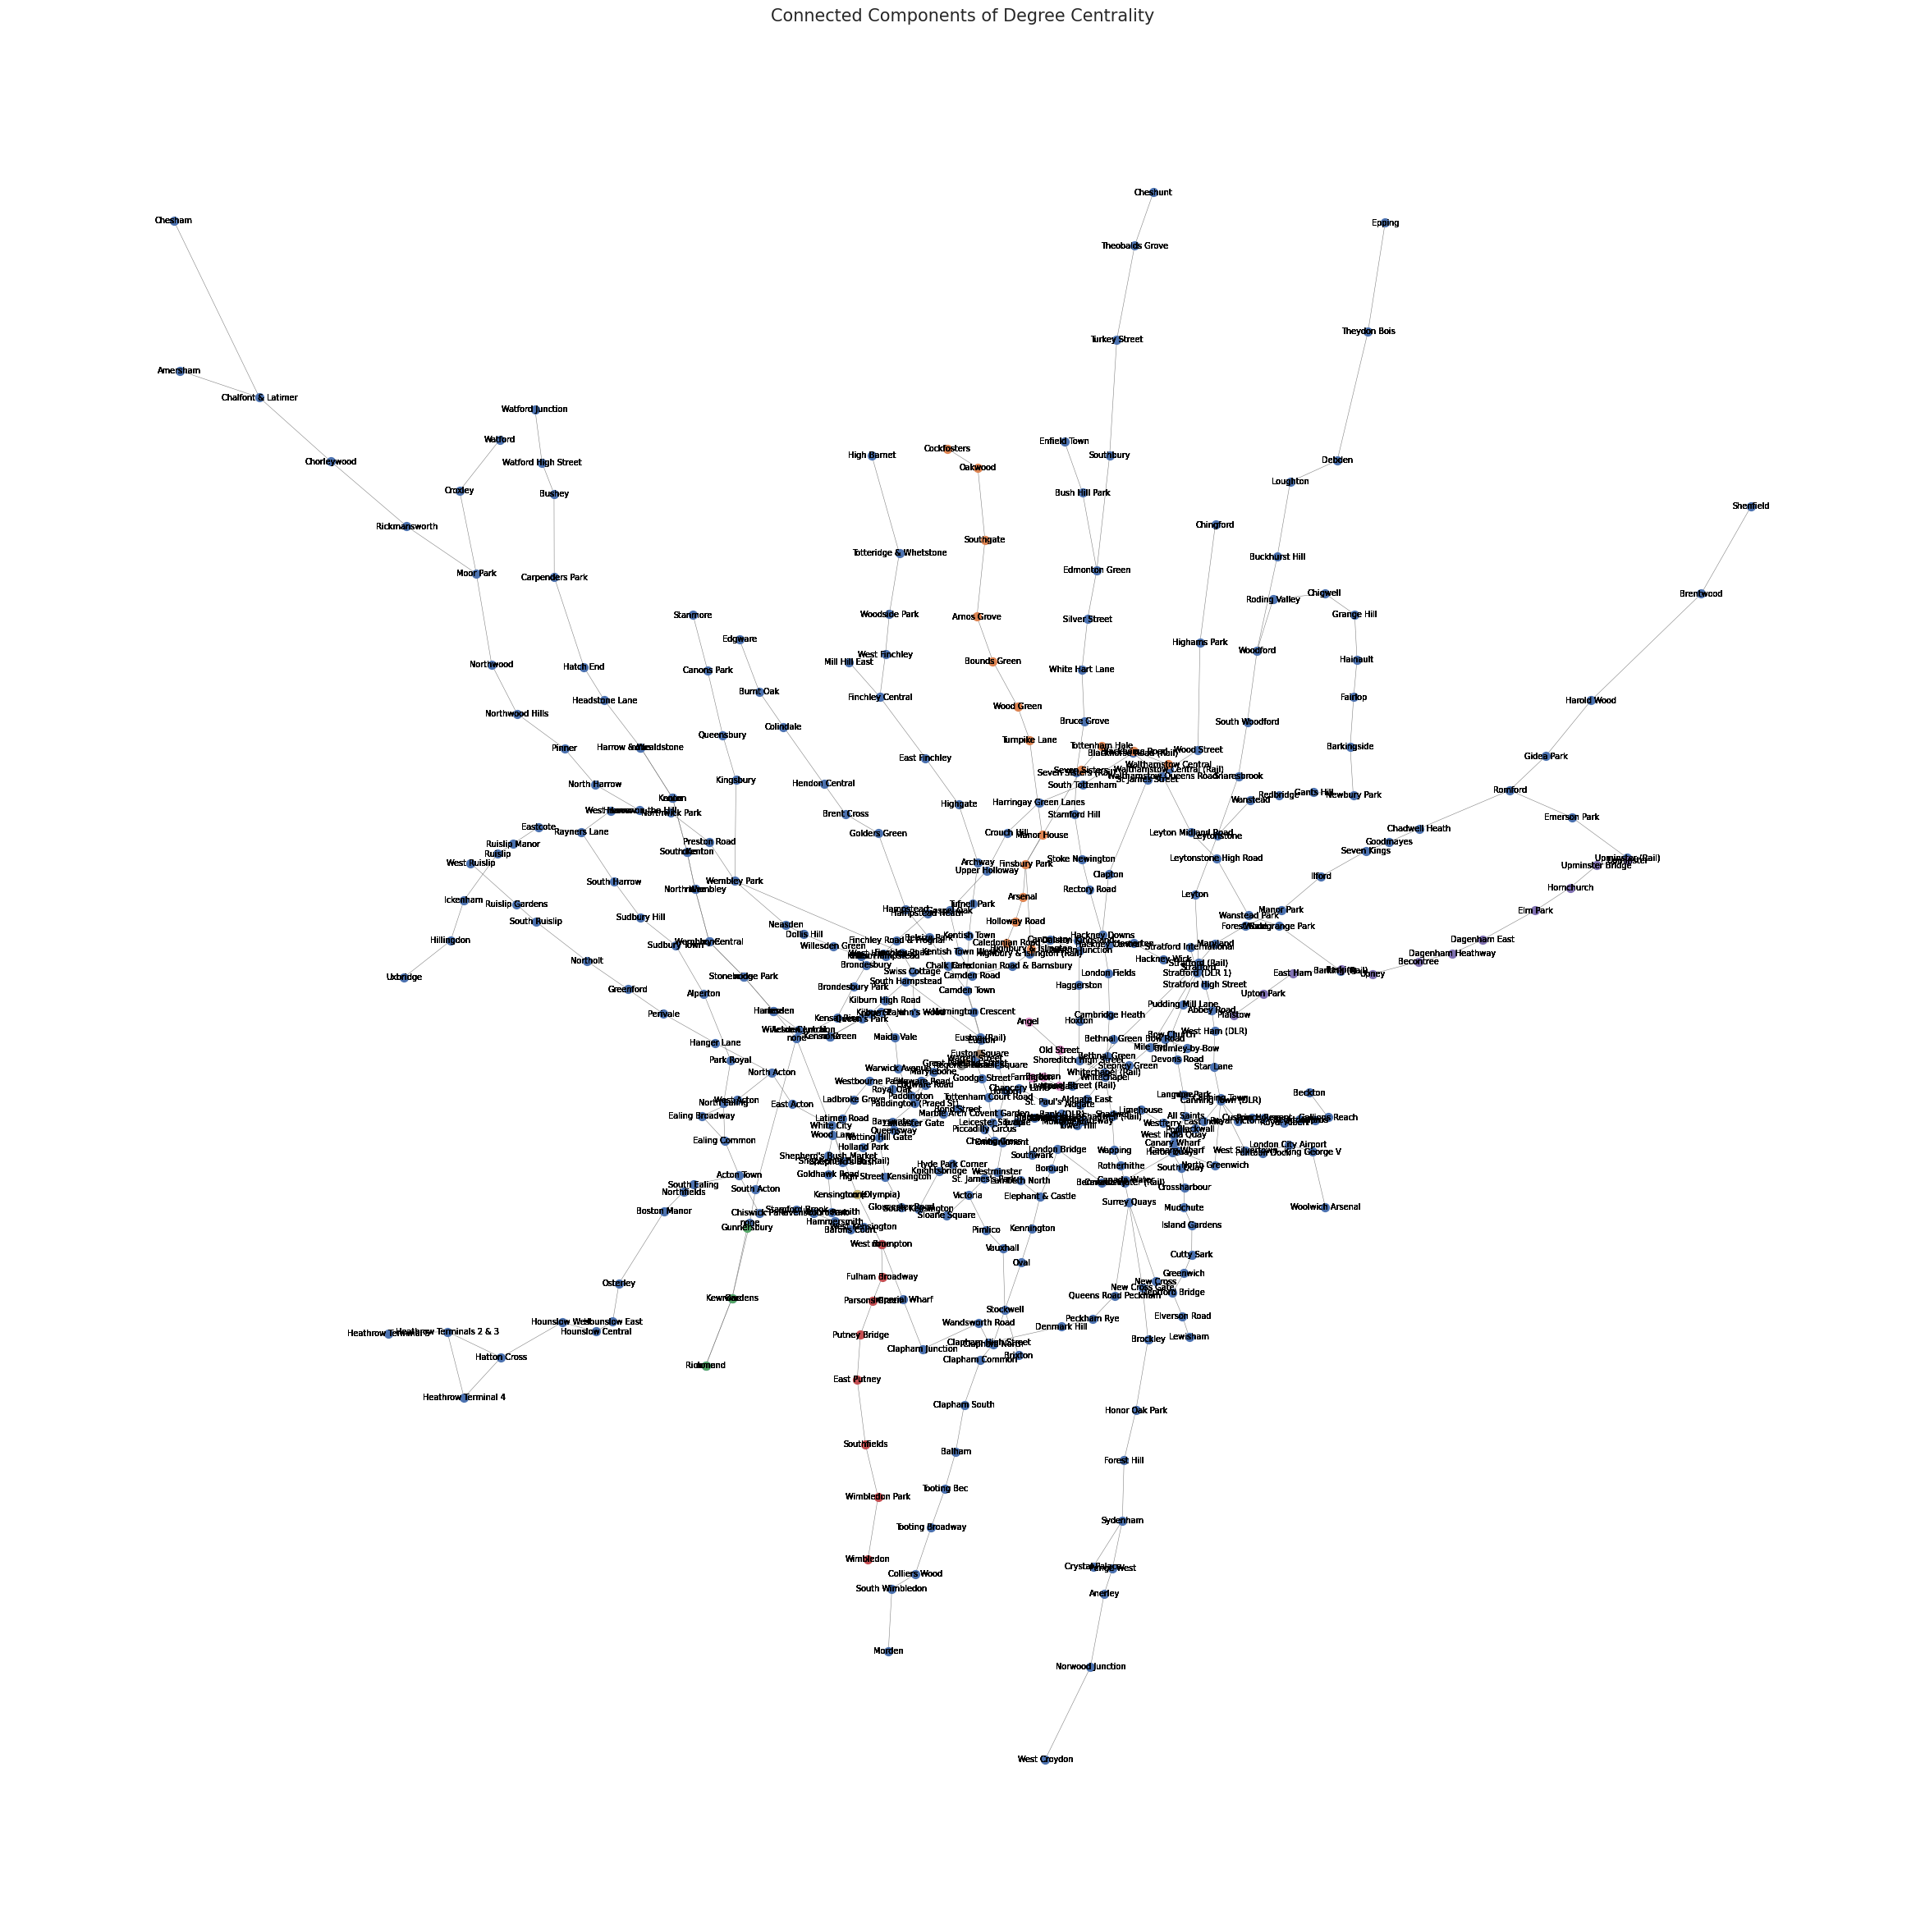

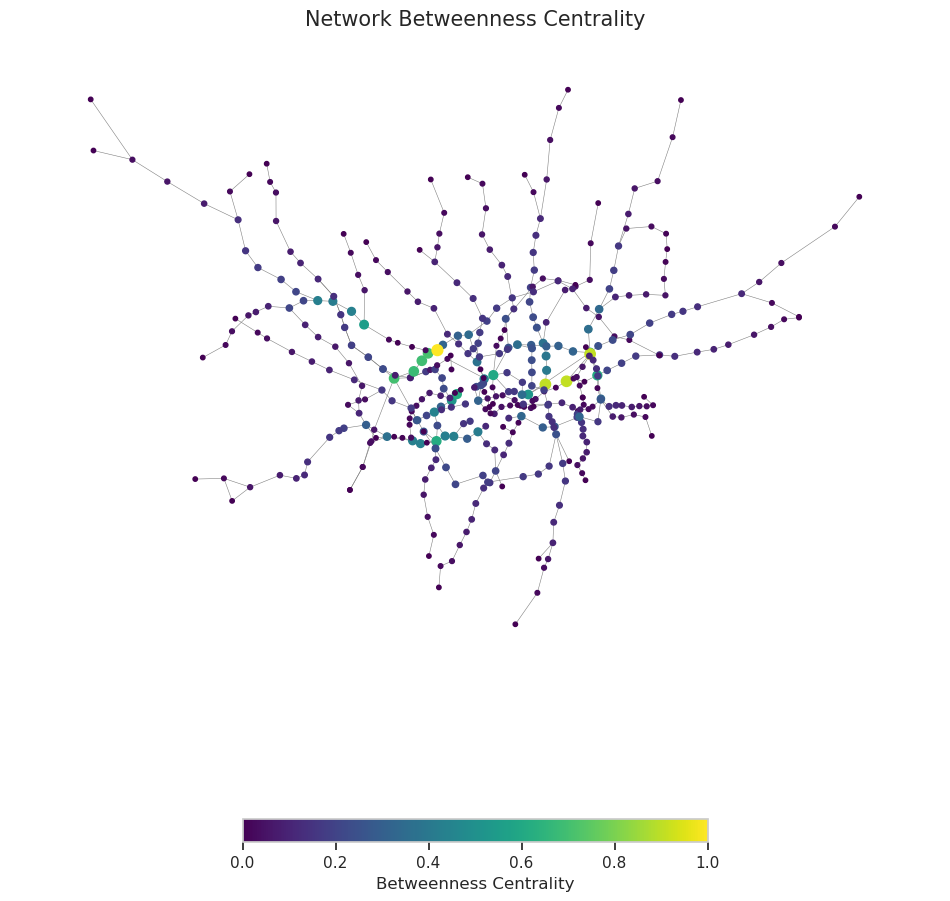

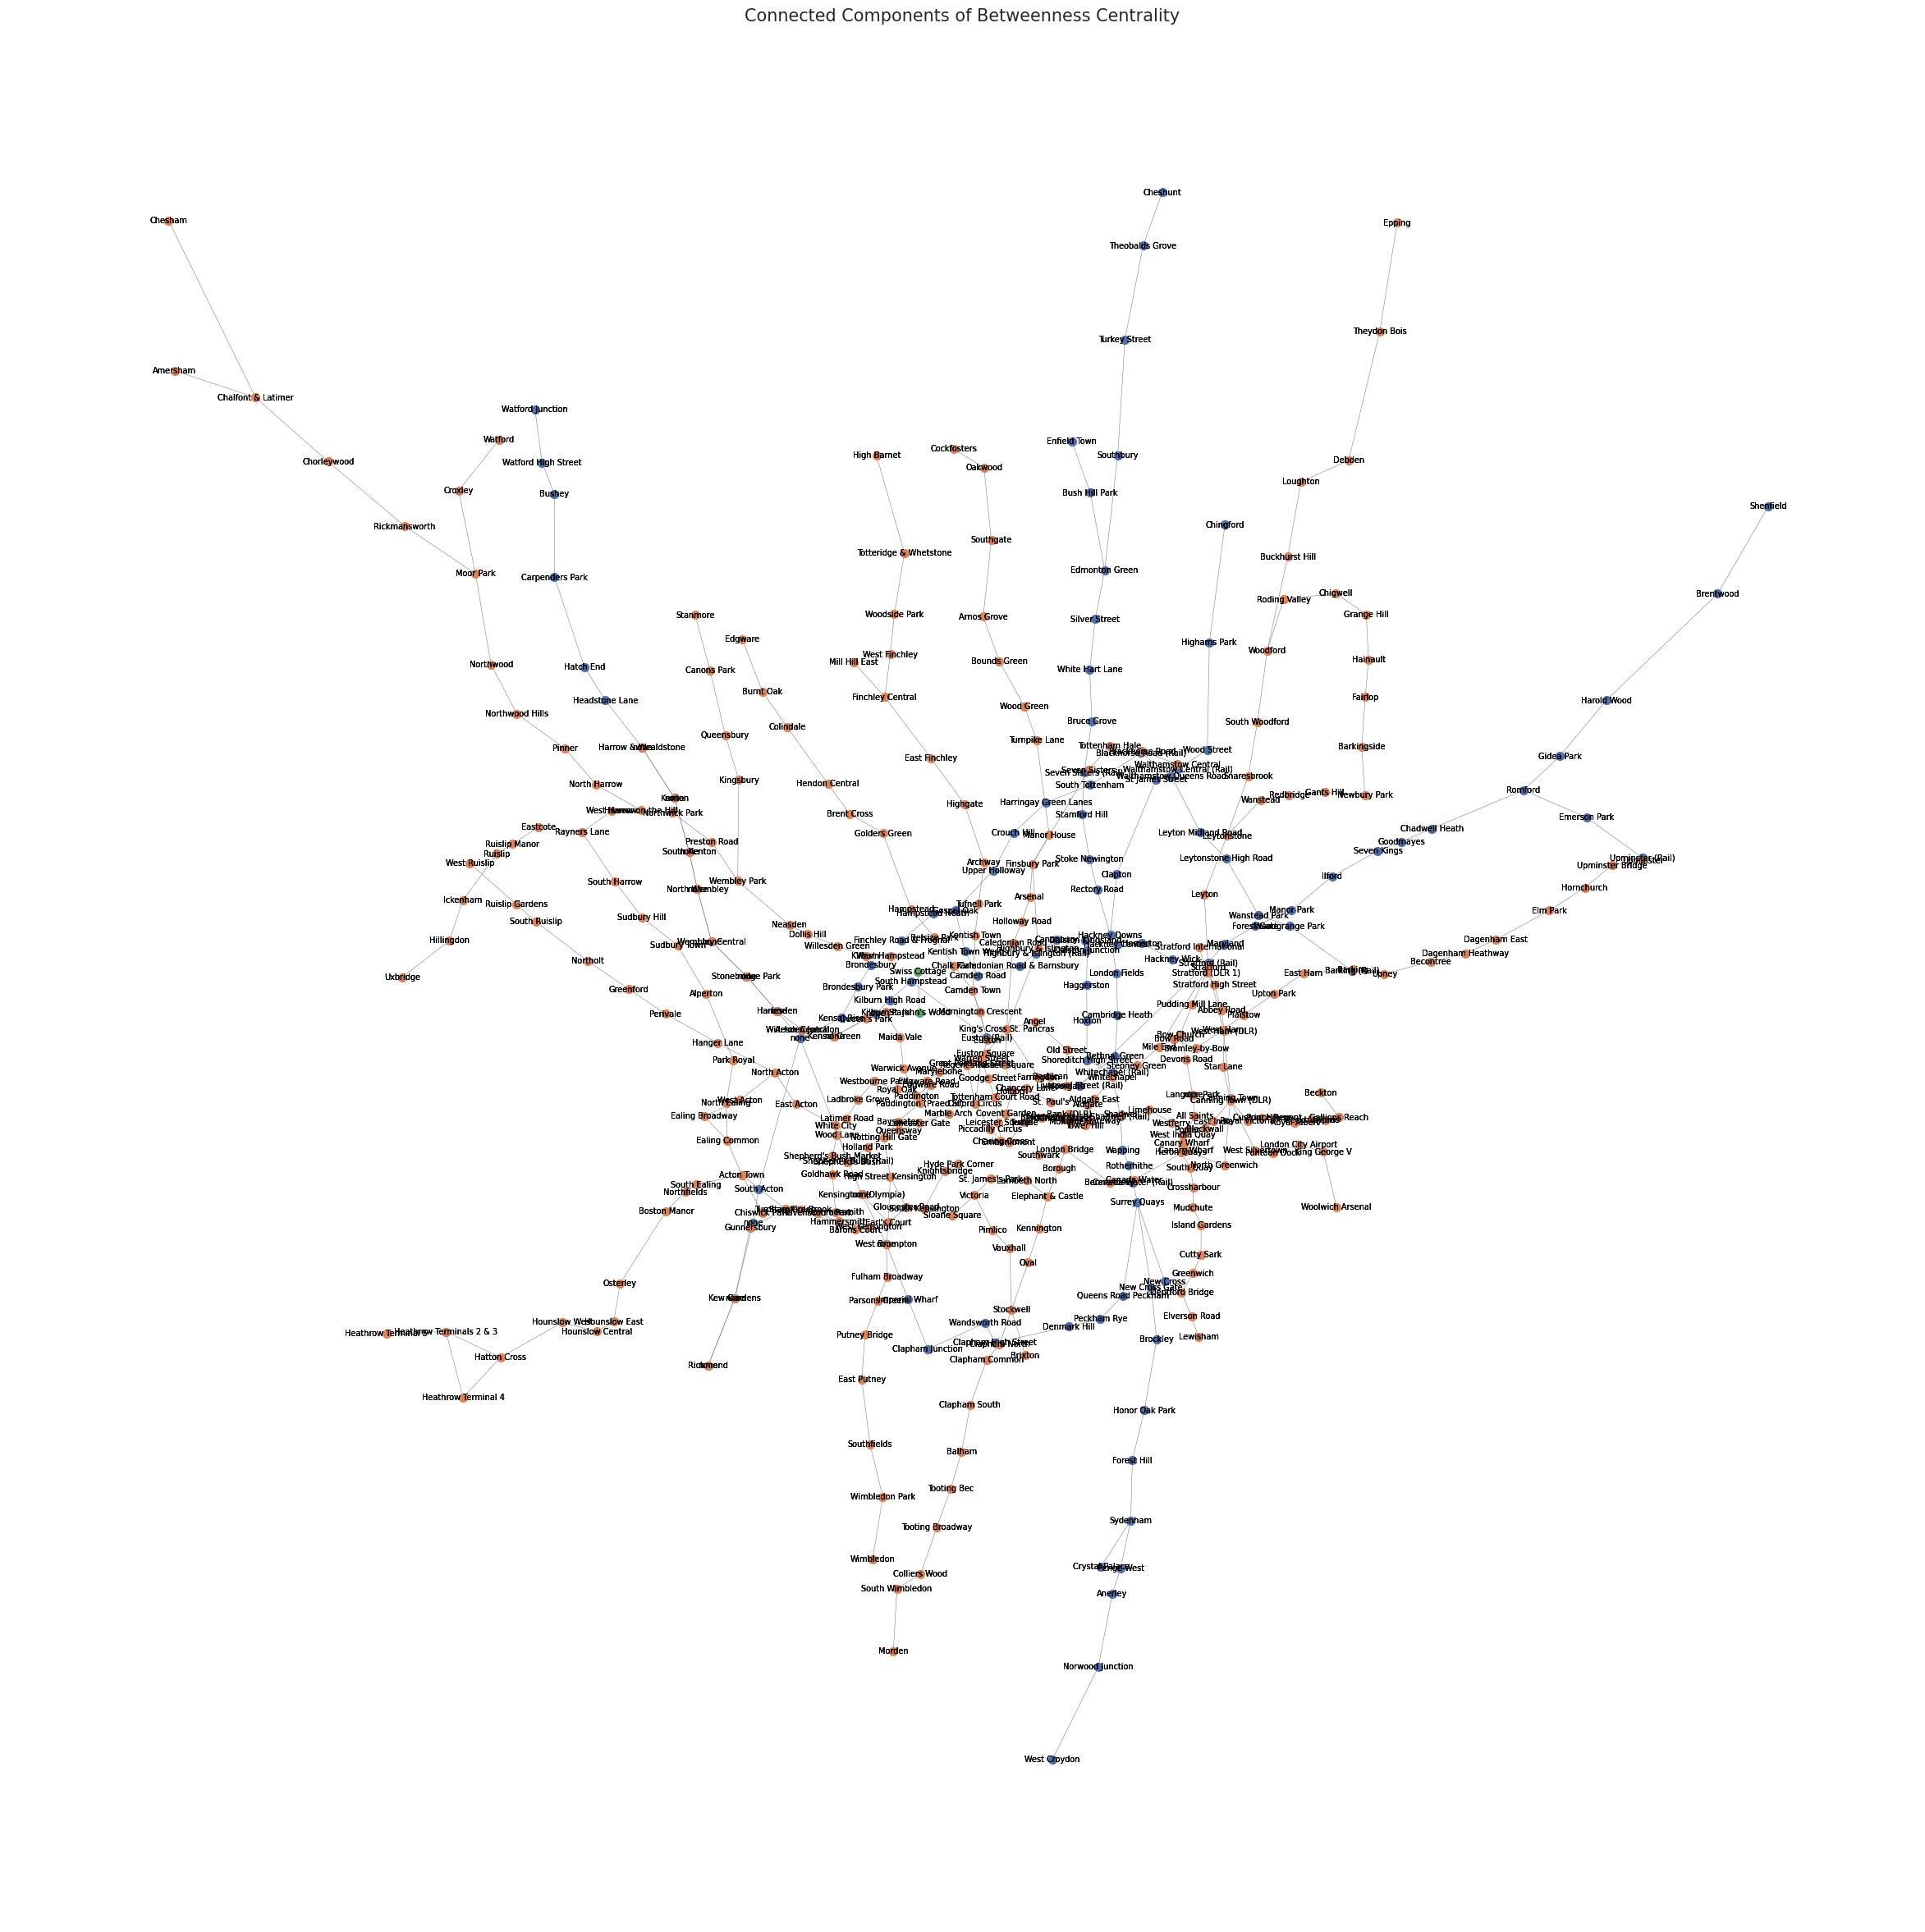

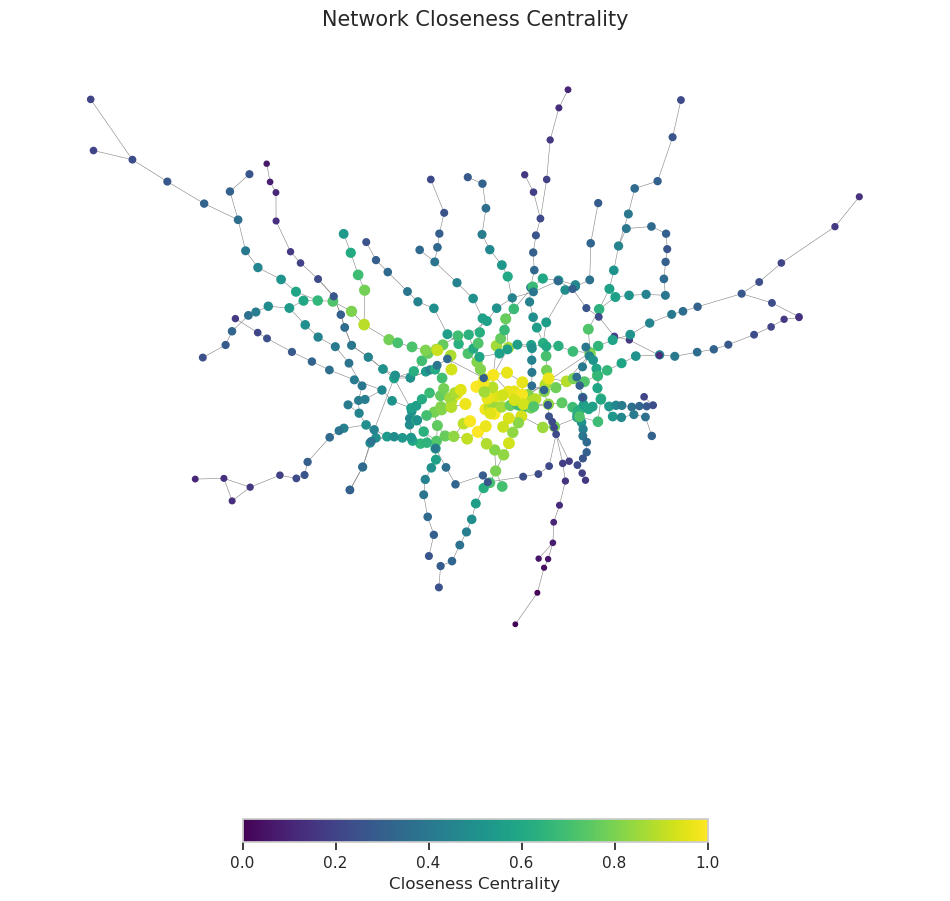

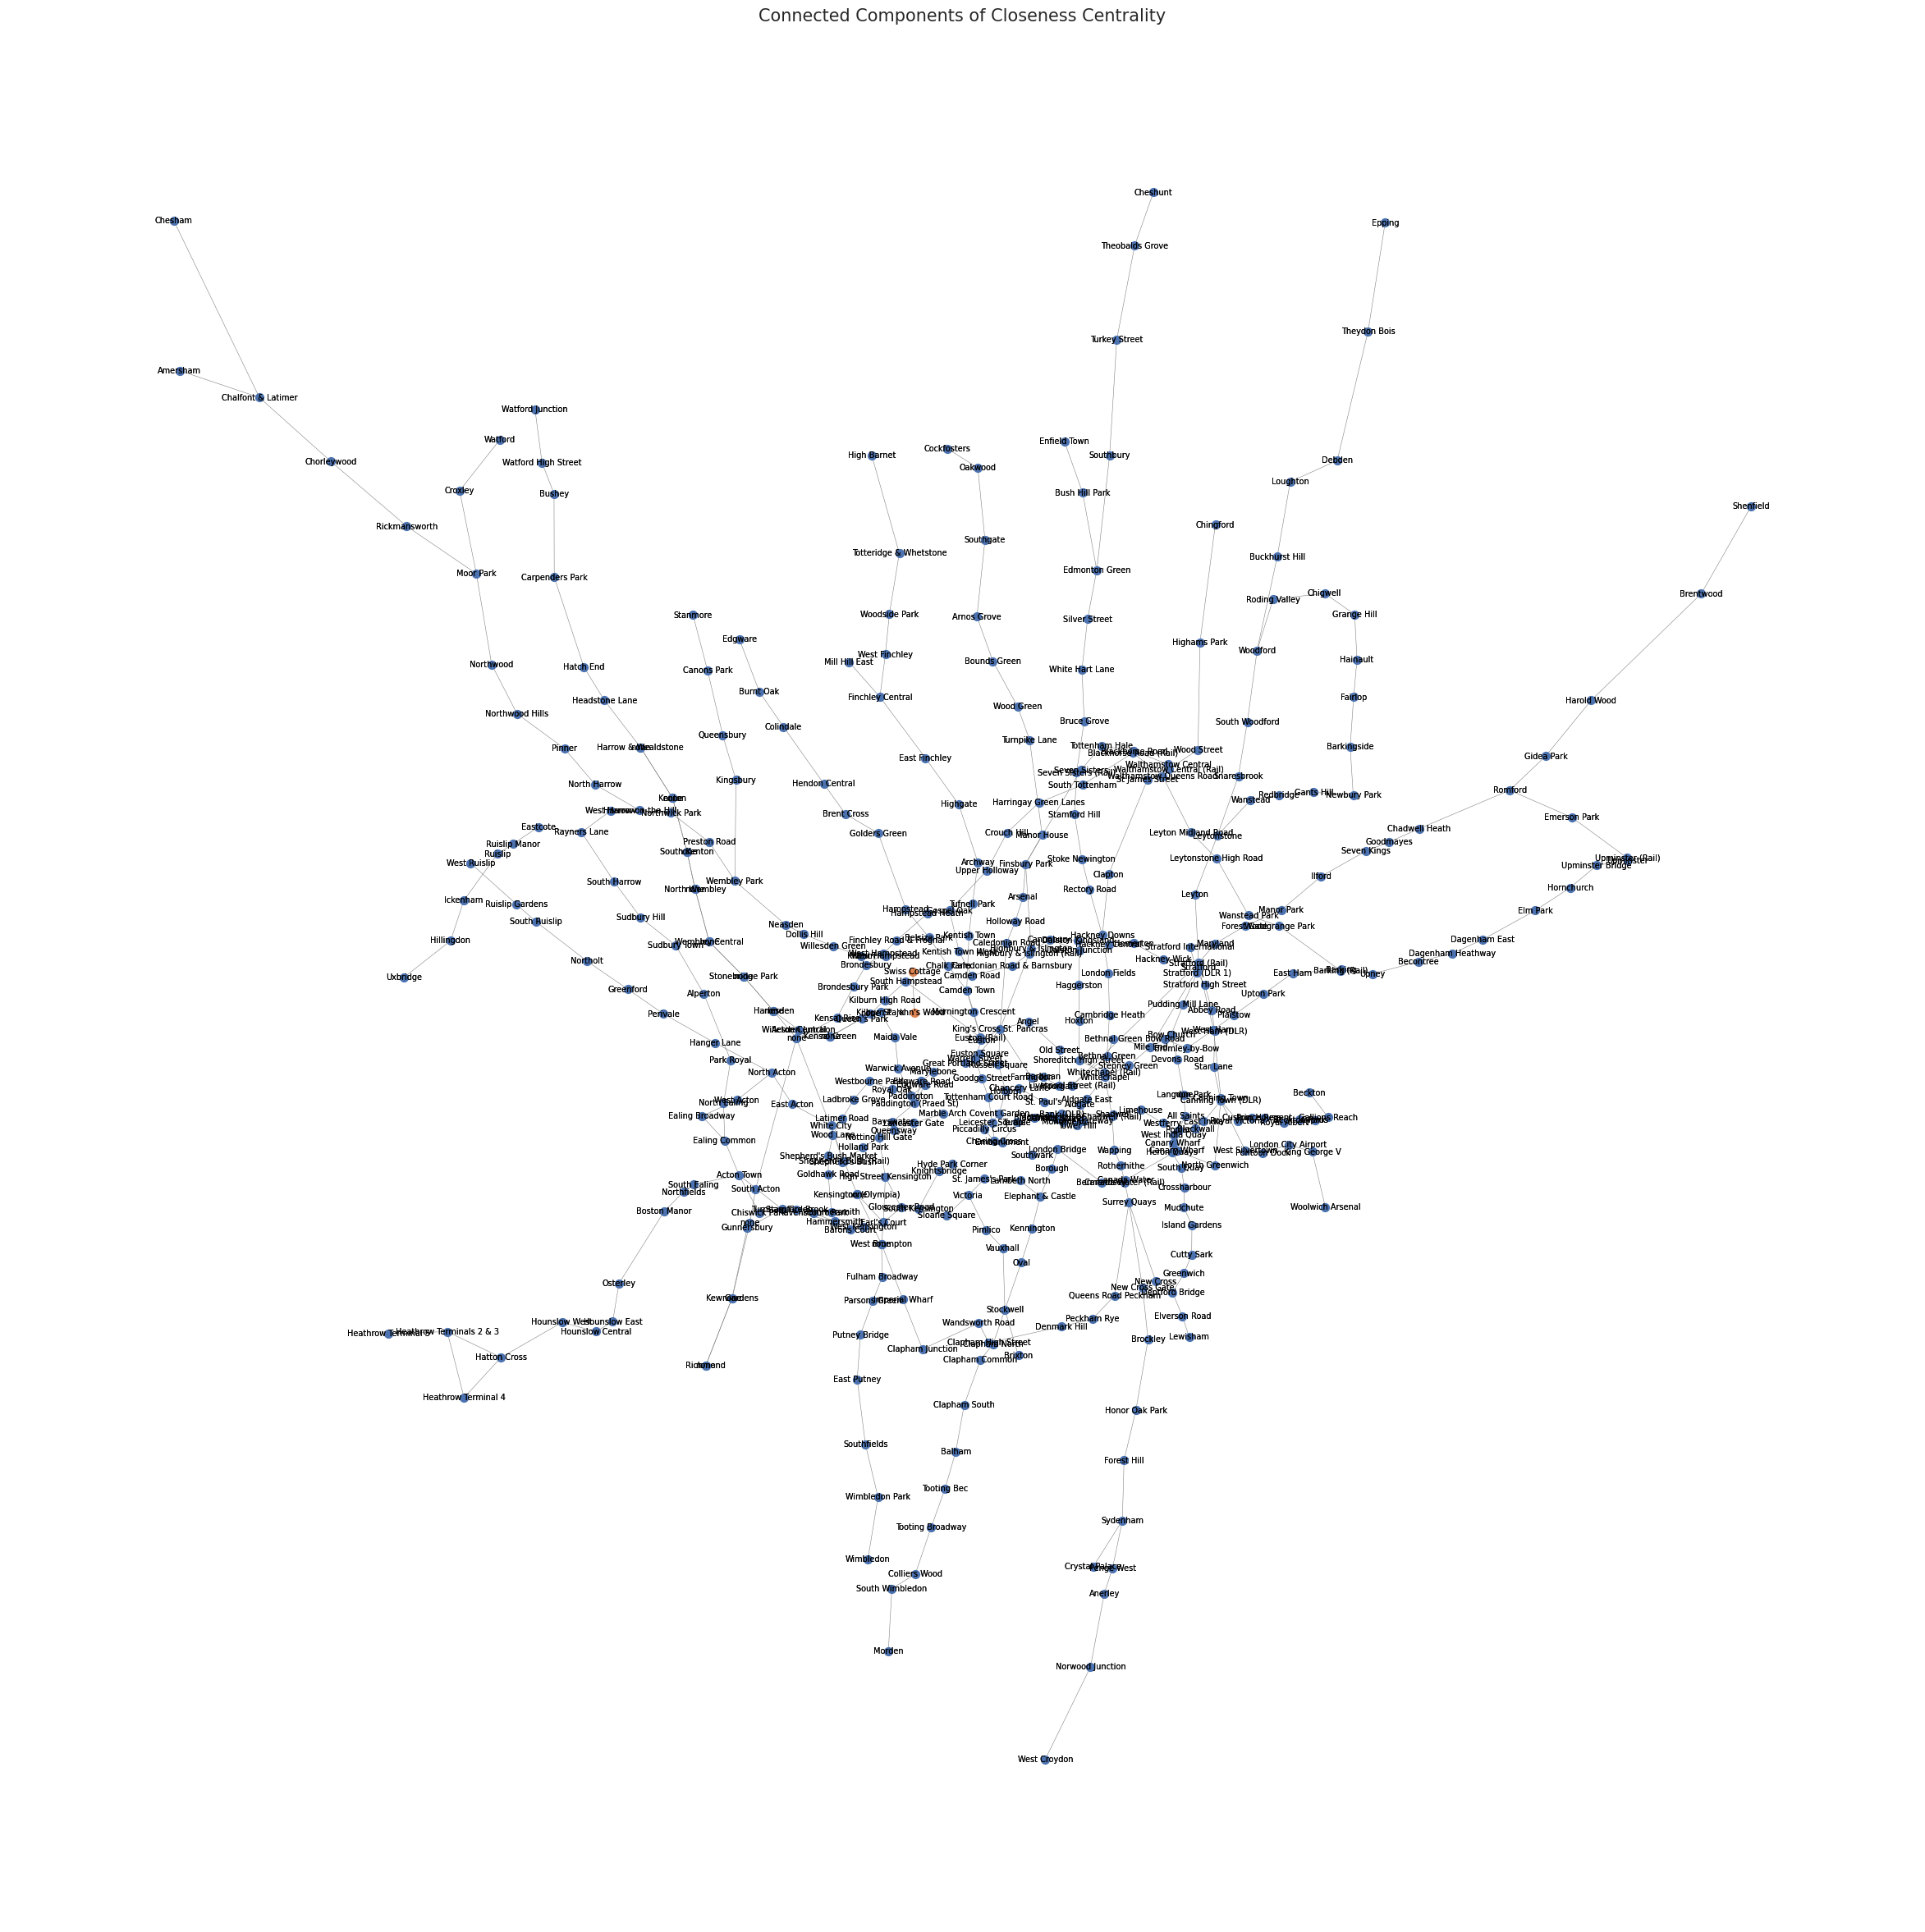

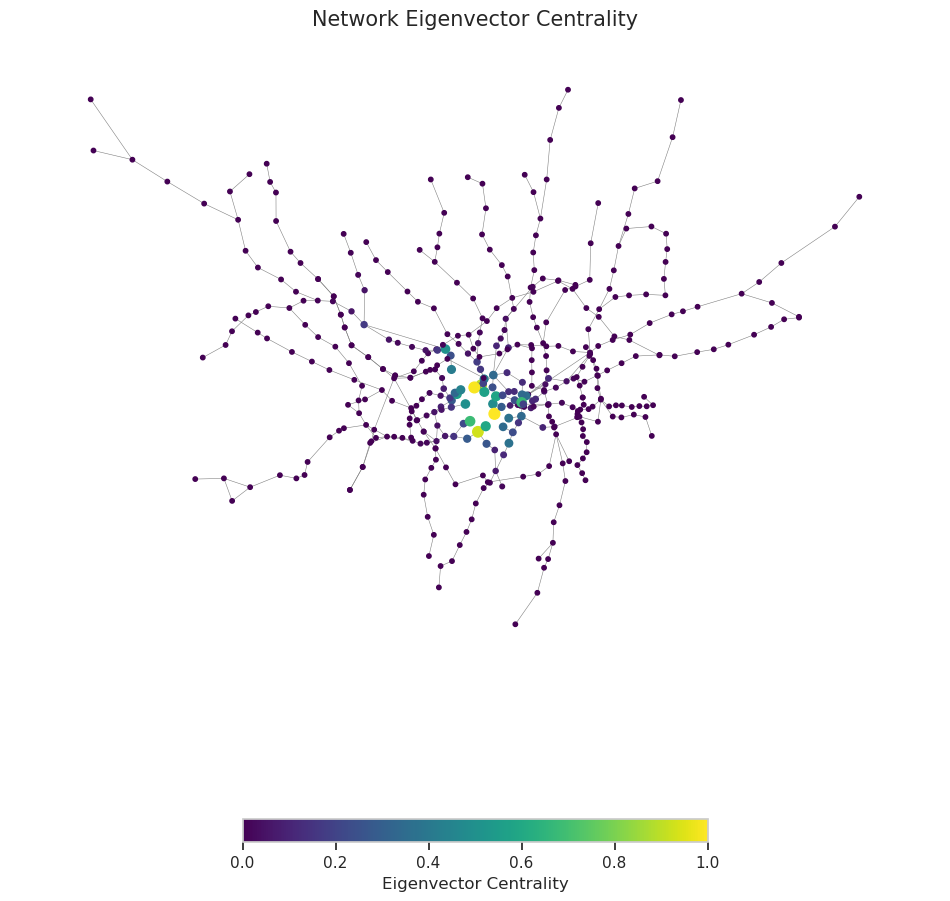

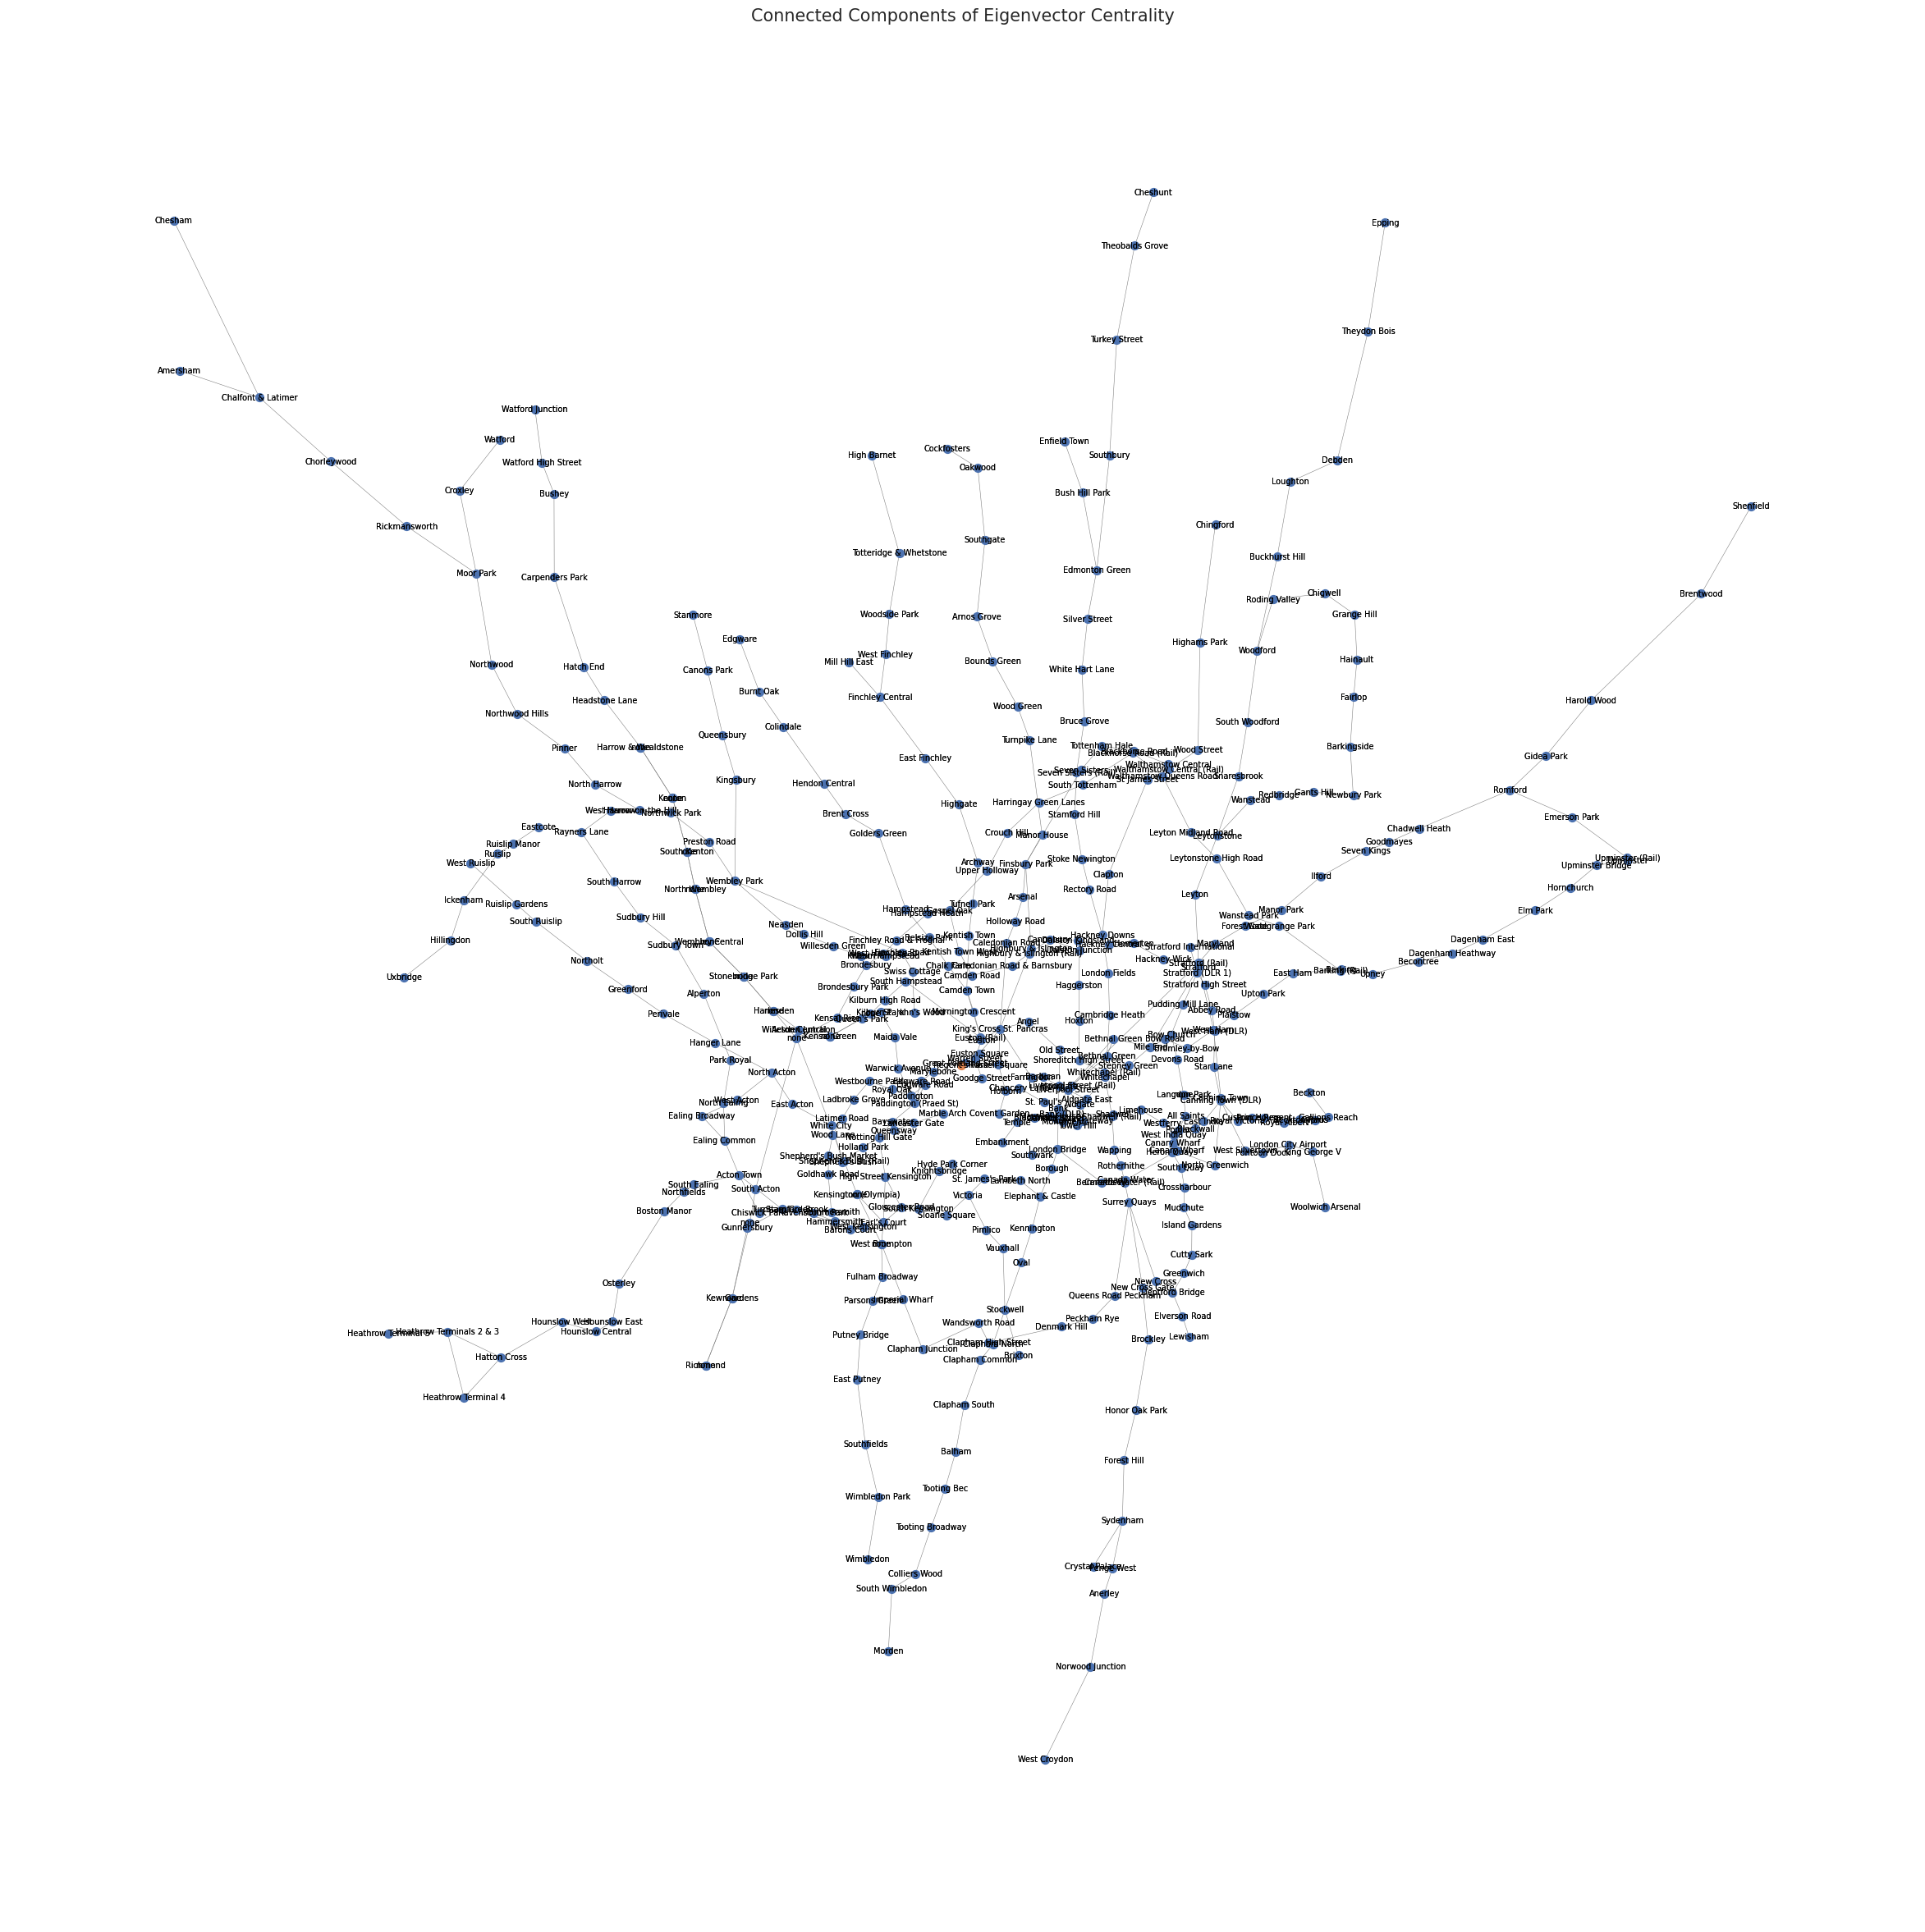

In [91]:
# For each centrality measure.
for measure in measure_names:
    G_temp = G.copy()
    efficiency = []
    nlcc = []
    
    # Get all nodes and their centrality measures.
    centrality_values = {node: data[measure] for node, data in G_temp.nodes(data=True)}
    
    # Sort nodes by centrality measure from largest to smallest.
    sorted_nodes = sorted(centrality_values, key=centrality_values.get, reverse=True)
    
    # Delete the first 10 nodes after sorting and calculate the global efficiency and NLCC.
    for i in range(min(10, len(sorted_nodes))):
        node_to_remove = sorted_nodes[i]
        G_temp.remove_node(node_to_remove)
        
        # Calculate global efficiency and NLCC after each node is deleted.
        efficiency.append(nx.global_efficiency(G_temp))
        nlcc.append(calculate_nlcc(G_temp))
        
    # Add results to results.
    results.append({
        'measure': measure,
        'efficiency': efficiency,
        'nlcc': nlcc   
    })

    plot_result_network(G_temp, measure)
    plot_result_network_cc(G_temp, measure)

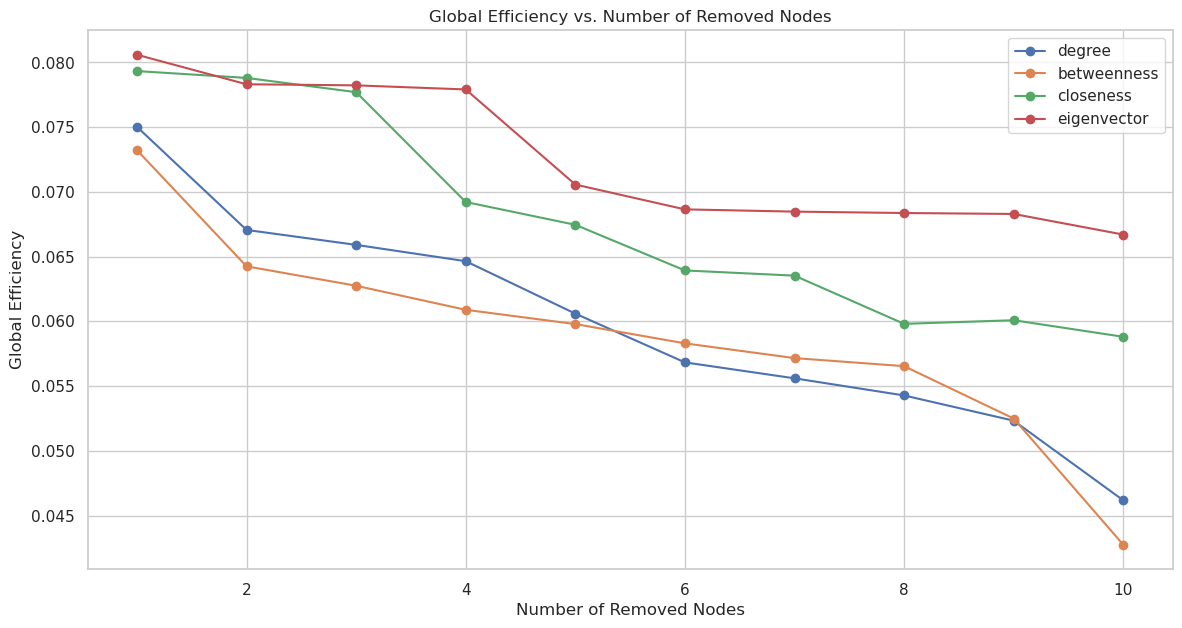

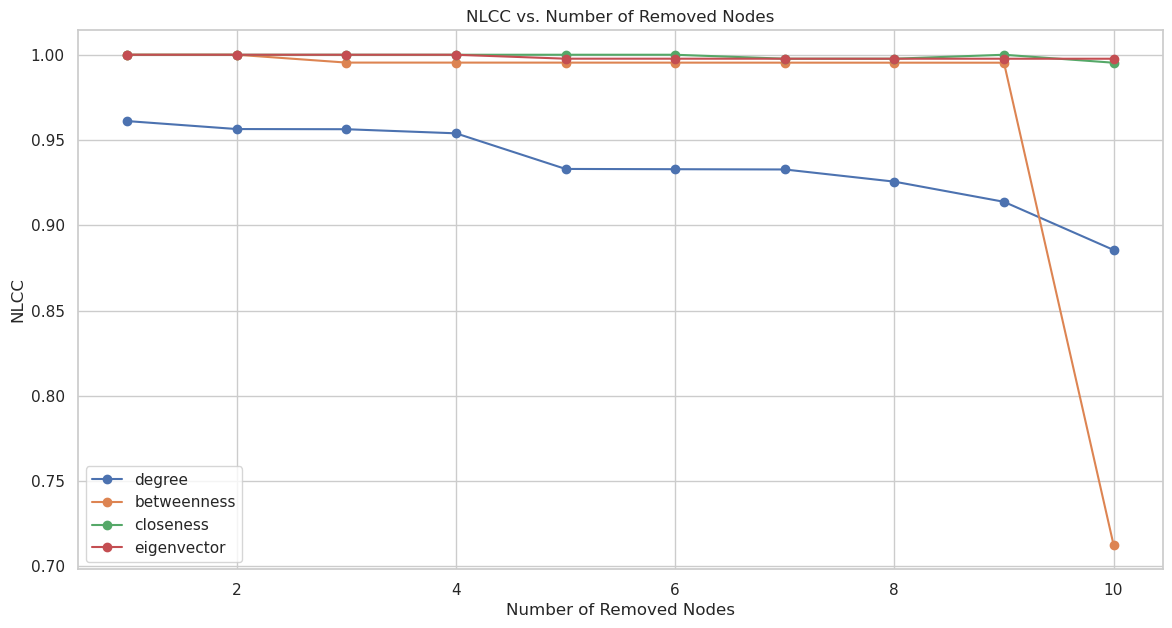

In [56]:
# 绘制全局效率图
plt.figure(figsize=(14, 7))

# 对于每种中心性度量，绘制全局效率曲线
for entry in results:
    plt.plot(range(1, 11), entry['efficiency'], '-o', label=entry['measure'])

plt.title('Global Efficiency vs. Number of Removed Nodes')
plt.xlabel('Number of Removed Nodes')
plt.ylabel('Global Efficiency')
plt.legend()
plt.show()

# 绘制NLCC图
plt.figure(figsize=(14, 7))

# 对于每种中心性度量，绘制NLCC曲线
for entry in results:
    plt.plot(range(1, 11), entry['nlcc'], '-o', label=entry['measure'])

plt.title('NLCC vs. Number of Removed Nodes')
plt.xlabel('Number of Removed Nodes')
plt.ylabel('NLCC')
plt.legend()
plt.show()

## II. Flows: weighted network

In [146]:
df_flows = pd.read_csv('london_flows.csv')

In [147]:
# Delete data rows containing "Battersea".
df_cleaned = df_flows[~df_flows['station_origin'].str.contains("Battersea", na=False) & ~df_flows['station_destination'].str.contains("Battersea", na=False)]

# View cleaned data.
print(df_cleaned.head())

  station_origin station_destination  flows  population   jobs     distance
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097
1     Abbey Road             Beckton      1         599    442  8510.121774
2     Abbey Road           Blackwall      3         599    665  3775.448872
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220
4     Abbey Road        Canning Town     37         599  15428  2228.923167
